# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [1]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Plotting graph
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [2]:
np_dictionary = {}

dir_name = "results"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-3'></a>
### 2.2 - Plot the PDE in one dimension: fix x=3 and varies t within [0, 2]

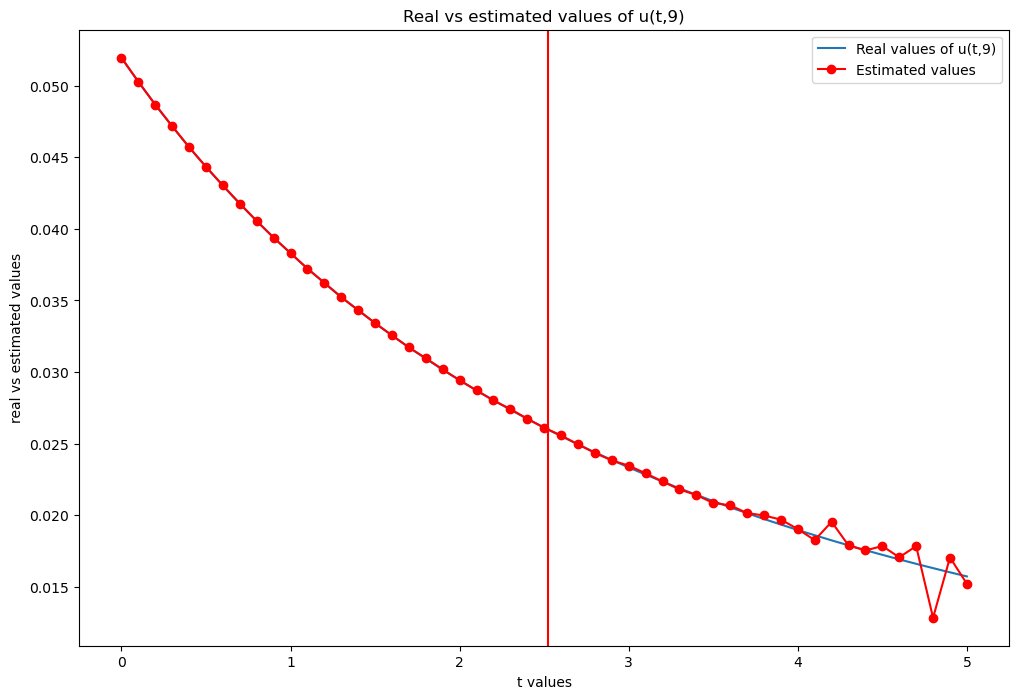

In [3]:
impose_ylim = False
y_lim = [0,0.2]

real_values = np.asarray(np_dictionary["analytic"])
real_values = np.reshape(real_values, (1001,))[0:501]
t_values = np.arange(0, 5.01, 0.01)
estimated_values = np.asarray(np_dictionary["monte_carlo"])
estimated_values = np.reshape(estimated_values, (51,))[0:51]
t_estimated = np.arange(0, 5.1, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, real_values, label='Real values of u(t,9)')
plt.plot(t_estimated, estimated_values, 'ro-', label='Estimated values')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
plt.axvline(x=2.52,color='red')

plt.title('Real vs estimated values of u(t,9)')
plt.legend(loc='upper right')
plt.show()

In [4]:
import math

t_vector = [i/100 for i in range(400)]
bound = []
for T in t_vector:
    estimated_bound = 512 * pow( pow(pow(9+T, 2)-4, -1) + pow(pow(9-T, 2)-4, -1), 2) * pow( pow(pow(9-T, 2)-4, -1) - pow(pow(9+T, 2)-4, -1), 2) * T * math.exp(3*T) * (1-math.exp(-2*T))
    bound.append(estimated_bound)

bound_print = [(i, bound[i]) for i in range(400)]
print(bound_print)

[(0, 0.0), (1, 2.5984827332466483e-13), (2, 4.241951990592294e-12), (3, 2.1912070149704864e-11), (4, 7.066716562498662e-11), (5, 1.7606123004237464e-10), (6, 3.725816066587351e-10), (7, 7.044788358117667e-10), (8, 1.2266532147664942e-09), (9, 2.005601439870872e-09), (10, 3.1204268842970076e-09), (11, 4.663917259764185e-09), (12, 6.743693616010551e-09), (13, 9.483434847933327e-09), (14, 1.302418210779209e-08), (15, 1.7525727759264995e-08), (16, 2.316809376203985e-08), (17, 3.0153104640689003e-08), (18, 3.8706060470452053e-08), (19, 4.90775156059618e-08), (20, 6.154516918762824e-08), (21, 7.64158737851194e-08), (22, 9.402776887894742e-08), (23, 1.1475254624050377e-07), (24, 1.3899785464875043e-07), (25, 1.6720985177930712e-07), (26, 1.998759115196612e-07), (27, 2.3752749540388315e-07), (28, 2.807431973225242e-07), (29, 3.301519711495306e-07), (30, 3.864365514392241e-07), (31, 4.503370778838183e-07), (32, 5.226549347872618e-07), (33, 6.042568174051356e-07), (34, 6.96079037625226e-07), (35

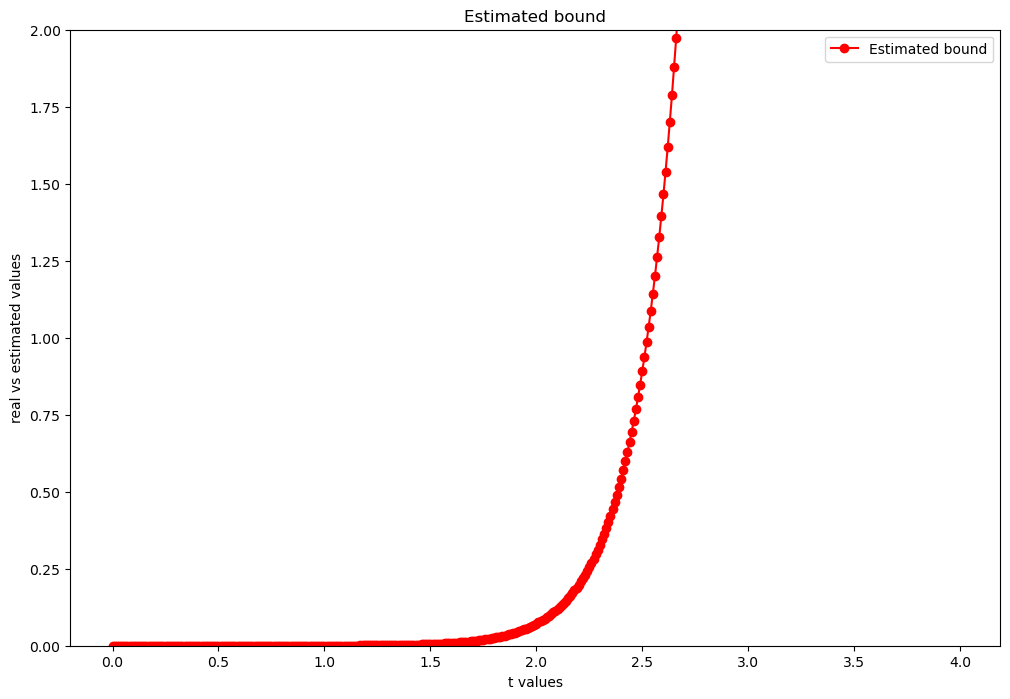

In [5]:
impose_ylim = True
y_lim = [0,2]

plt.figure(figsize=(12, 8))
plt.plot(t_vector, bound, 'ro-', label='Estimated bound')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
# plt.axvline(x=30,color='red')

plt.title('Estimated bound')
plt.legend(loc='upper right')
plt.show()